This notebook is broken into two halves both providing code for the boosing analysis.  The first part is for the Titanic data set.  The second part is for the Diabetes data set

In [1]:
#Titanic Analysis
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix #tester
from sklearn.metrics import f1_score  #tester
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
df=pd.read_csv("dataSets/titanic.csv")

In [2]:
pip freeze

aiohttp @ file:///C:/ci/aiohttp_1646806572557/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.2.0
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1650634291321/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-timeout @ file:///tmp/build/80754af9/async-timeout_1637851218186/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/8075

In [18]:
del df["PassengerId"]
del df["Name"]
del df["Ticket"]
del df["Cabin"]
df['Sex']=df['Sex'].replace(to_replace='male',value='1')
df['Sex']=df['Sex'].replace(to_replace='female',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
df=df.dropna()
y=df['Survived']
X=df.drop(['Survived'],axis=1)
df=df.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [19]:
tic = time.perf_counter()
result=[]
depth=[1,2,3]
learners=[10,20,30,40,50,60,70]

for i in range(len(depth)):
    for j in range(len(learners)):
            model=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=depth[i], random_state=25),n_estimators=learners[j], learning_rate=1)
            model.fit(X_train, y_train)          
            y_predicted_test = model.predict(X_test)
            y_predicted_train=model.predict(X_train)
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            f1_train=f1_score(y_train,y_predicted_train)
            f1_test=f1_score(y_test,y_predicted_test)
            temp=[depth[i], learners[j], round(train_score,3),round(test_score,3),round(f1_train,3),round(f1_test,3)]
            result.append(temp)
df_results=pd.DataFrame(result,columns=["Tree Depth", "Number of Estimators Used", "Train Data Score", "Test Data Score", "Train f-score", "Test f-score"])
print(df_results)
toc = time.perf_counter()
print(f"conducted boosting grid search in {toc - tic:0.4f} seconds")

    Tree Depth  Number of Estimators Used  Train Data Score  Test Data Score  \
0            1                         10             0.826            0.809   
1            1                         20             0.831            0.798   
2            1                         30             0.830            0.803   
3            1                         40             0.835            0.803   
4            1                         50             0.837            0.815   
5            1                         60             0.843            0.798   
6            1                         70             0.848            0.798   
7            2                         10             0.858            0.792   
8            2                         20             0.882            0.747   
9            2                         30             0.904            0.770   
10           2                         40             0.921            0.753   
11           2                         5

In [10]:
tic = time.perf_counter()
model=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=25),n_estimators=40, learning_rate=1)
toc = time.perf_counter()
print(f"fitted model in {toc - tic:0.4f} seconds")

fitted model in 0.0002 seconds


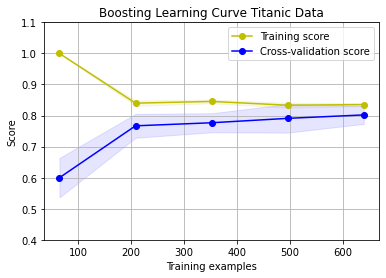

In [4]:
model=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=25),n_estimators=50, learning_rate=1)
title="Boosting Learning Curve Titanic Data"
trainingSizes,trainingScores,testingScores = learning_curve(model,X,y,random_state = 42,cv = 10)
plt.figure()
plt.title(title)
ylim = (0.4, 1.1)
if ylim is not None:
    plt.ylim(*ylim)
        
plt.xlabel("Training examples")
plt.ylabel("Score")
    
trainingScores_std = np.std(trainingScores, axis=1)
trainingScores_mean = np.mean(trainingScores, axis=1)
testingScores_mean = np.mean(testingScores, axis=1)
testingScores_std = np.std(testingScores, axis=1)
plt.grid()

plt.fill_between(trainingSizes, trainingScores_mean - trainingScores_std,
                trainingScores_mean + trainingScores_std, alpha=0.1,
                color="y")
plt.fill_between(trainingSizes, testingScores_mean - testingScores_std,
                testingScores_mean + testingScores_std, alpha=0.1, color="b")
plt.plot(trainingSizes, trainingScores_mean, 'o-', color="y",
        label="Training score")
plt.plot(trainingSizes, testingScores_mean, 'o-', color="b",
        label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Diabetes data set analysis now follows

In [11]:
df=pd.read_csv("dataSets/diabetes.csv")
zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in zero_to_nan:
             df[col]=df[col].replace(0,np.NaN)
             mean=int(df[col].mean(skipna=True))
             df[col]=df[col].replace(np.NaN,mean)
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  #same as DT
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [12]:
result=[]
depth=[1,2,3]
learners=[10,20,30,40,50,60,70]
tic = time.perf_counter()
for i in range(len(depth)):
    for j in range(len(learners)):
            model=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=depth[i], random_state=25),n_estimators=learners[j], learning_rate=1)
            model.fit(X_train, y_train)          
            y_predicted_test = model.predict(X_test)
            y_predicted_train=model.predict(X_train)
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            f1_train=f1_score(y_train,y_predicted_train)
            f1_test=f1_score(y_test,y_predicted_test)
            temp=[depth[i], learners[j], round(train_score,3),round(test_score,3),round(f1_train,3),round(f1_test,3)]
            result.append(temp)
df_results=pd.DataFrame(result,columns=["Tree Depth", "Number of Estimators Used", "Train Data Score", "Test Data Score", "Train f-score", "Test f-score"])
print(df_results)
toc = time.perf_counter()
print(f"conducted grid search in {toc - tic:0.4f} seconds")

    Tree Depth  Number of Estimators Used  Train Data Score  Test Data Score  \
0            1                         10             0.767            0.727   
1            1                         20             0.798            0.766   
2            1                         30             0.818            0.779   
3            1                         40             0.831            0.792   
4            1                         50             0.824            0.773   
5            1                         60             0.834            0.779   
6            1                         70             0.849            0.779   
7            2                         10             0.824            0.760   
8            2                         20             0.896            0.773   
9            2                         30             0.928            0.786   
10           2                         40             0.948            0.773   
11           2                         5

In [14]:
tic = time.perf_counter()
model=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=25),n_estimators=40, learning_rate=1)
model.fit(X_train, y_train)          
y_predicted_test = model.predict(X_test)
y_predicted_train=model.predict(X_train)
toc=time.perf_counter()
print(f"fitted model in {toc - tic:0.4f} seconds")


cm=confusion_matrix(y_test,y_predicted_test)
print(cm)
print(accuracy_score(y_test, y_predicted_test)) #represents the model’s ability to correctly predict the positives out of actual positives
print(recall_score(y_test, y_predicted_test)) #represents the model’s ability to correctly predict the positives out of actual positives
print(precision_score(y_test, y_predicted_test)) #precision which measures how many predictions made by models are actually positive out of all positive predictions made

fitted model in 0.1477 seconds
[[89 18]
 [14 33]]
0.7922077922077922
0.7021276595744681
0.6470588235294118


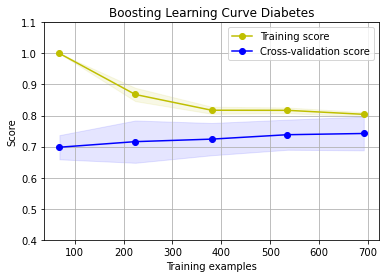

In [15]:
model=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=25),n_estimators=25, learning_rate=1)
title="Boosting Learning Curve Diabetes"
trainingSizes,trainingScores,testingScores = learning_curve(model,X,y,random_state = 42,cv = 10)
plt.figure()
plt.title(title)
ylim = (0.4, 1.1)
if ylim is not None:
    plt.ylim(*ylim)
        
plt.xlabel("Training examples")
plt.ylabel("Score")
    
trainingScores_std = np.std(trainingScores, axis=1)
trainingScores_mean = np.mean(trainingScores, axis=1)
testingScores_mean = np.mean(testingScores, axis=1)
testingScores_std = np.std(testingScores, axis=1)
plt.grid()

plt.fill_between(trainingSizes, trainingScores_mean - trainingScores_std,
                trainingScores_mean + trainingScores_std, alpha=0.1,
                color="y")
plt.fill_between(trainingSizes, testingScores_mean - testingScores_std,
                testingScores_mean + testingScores_std, alpha=0.1, color="b")
plt.plot(trainingSizes, trainingScores_mean, 'o-', color="y",
        label="Training score")
plt.plot(trainingSizes, testingScores_mean, 'o-', color="b",
        label="Cross-validation score")

plt.legend(loc="best")
plt.show()